In [318]:
# importing the required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import seaborn as sns  
from sklearn.model_selection import train_test_split


In [319]:
# reading the dataset
twitter_data = pd.read_csv('./dataset/twitter_training.csv')

In [320]:
# checking the shape of the dataset
print("Shape of the dataset:", twitter_data.shape)


Shape of the dataset: (74681, 4)


In [321]:
# checking the first few rows of the dataset
print(twitter_data.head())


   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     


In [322]:
# Descriptive statistics of the dataset
print(twitter_data.describe())

               2401
count  74681.000000
mean    6432.640149
std     3740.423819
min        1.000000
25%     3195.000000
50%     6422.000000
75%     9601.000000
max    13200.000000


In [323]:
# naming the features and applying on the dataset
features = ['ID', 'Topic', 'Sentiment', 'Text']
twitter_data.columns = features

# checking the first few rows of the dataset
print(twitter_data.head())


     ID        Topic Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                Text  
0  I am coming to the borders and I will kill you...  
1  im getting on borderlands and i will kill you ...  
2  im coming on borderlands and i will murder you...  
3  im getting on borderlands 2 and i will murder ...  
4  im getting into borderlands and i can murder y...  


In [324]:

# checking missing values in the dataset
print(twitter_data.isnull().sum())

ID             0
Topic          0
Sentiment      0
Text         686
dtype: int64


In [325]:
# dropping the missing values
twitter_data.dropna(inplace=True)


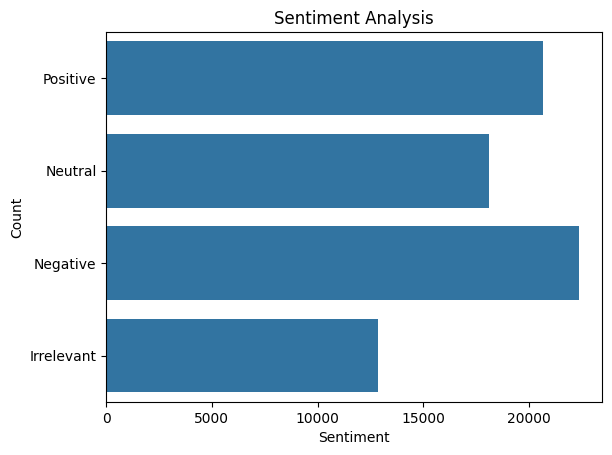

In [326]:
# visualizing and analyzing the sentiment column
sns.countplot(twitter_data['Sentiment'])
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

 

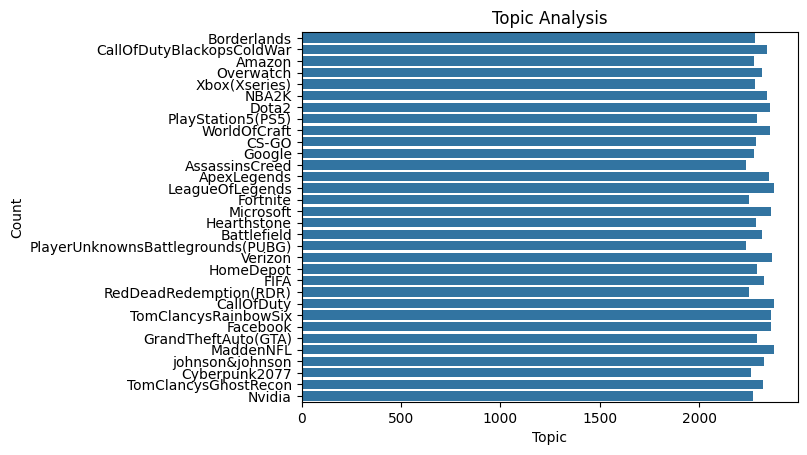

In [327]:
 # visualizing and analyzing the topic column
sns.countplot(twitter_data['Topic'])
plt.title('Topic Analysis')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.show()



In [328]:
# removing the ID column
twitter_data.drop('ID', axis=1, inplace=True)

In [329]:
# standardizing the text column

import nltk

# Ensure you have the necessary nltk resources downloaded
nltk.download('stopwords')
nltk.download('wordnet')

# Lowercasing the text
twitter_data['Text'] = twitter_data['Text'].str.lower()

# Removing the special characters
twitter_data['Text'] = twitter_data['Text'].str.replace(r'[^\w\d\s]', ' ')

# Removing the stopwords
stop_words = set(stopwords.words('english'))
twitter_data['Text'] = twitter_data['Text'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

# stemming the text
stemmer = PorterStemmer()
twitter_data['Text'] = twitter_data['Text'].apply(lambda x: ' '.join(stemmer.stem(term) for term in x.split()))


[nltk_data] Downloading package stopwords to /home/hussen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/hussen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [330]:
# checking the first few rows of the dataset
print(twitter_data.head())

# showing all text in Text column for the first row
print(twitter_data['Text'][0])

         Topic Sentiment                             Text
0  Borderlands  Positive            come border kill all,
1  Borderlands  Positive      im get borderland kill all,
2  Borderlands  Positive   im come borderland murder all,
3  Borderlands  Positive  im get borderland 2 murder all,
4  Borderlands  Positive    im get borderland murder all,
come border kill all,


In [331]:
# Label Encoding 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Encoding the Topic column
twitter_data['Topic'] = le.fit_transform(twitter_data['Topic'])

# Encoding the Sentiment column into numbers from 1-4
twitter_data['Sentiment'] = le.fit_transform(twitter_data['Sentiment'])


# Encoding the text column
twitter_data['Text'] = le.fit_transform(twitter_data['Text'])


In [332]:
# showing the first few rows of the dataset
print(twitter_data.tail())

       Topic  Sentiment   Text
74676     21          3  50131
74677     21          3  50113
74678     21          3  50128
74679     21          3  50129
74680     21          3  38949


In [333]:
# Separating the dependent and independent variables
y = twitter_data['Sentiment']
X = twitter_data.drop('Sentiment', axis=1)



In [334]:
# Splitting the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [335]:
# checking the shape of the training and testing sets
print("Shape of the training set:", X_train.shape)
print("Shape of the testing set:", X_test.shape)

# checking the shape of the training and testing sets
print("Shape of the training set:", y_train.shape)
print("Shape of the testing set:", y_test.shape)



Shape of the training set: (59196, 2)
Shape of the testing set: (14799, 2)
Shape of the training set: (59196,)
Shape of the testing set: (14799,)


In [336]:
# model building
from sklearn.ensemble import RandomForestClassifier

# creating the model
model = RandomForestClassifier()

# training the model
model.fit(X_train, y_train)





RandomForestClassifier()

In [337]:
# checking the classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.81      0.79      0.80      2624
           1       0.83      0.81      0.82      4463
           2       0.79      0.80      0.80      3589
           3       0.80      0.82      0.81      4123

    accuracy                           0.81     14799
   macro avg       0.81      0.81      0.81     14799
weighted avg       0.81      0.81      0.81     14799



In [338]:
# making predictions
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [339]:
# checking the accuracy of the model

print("Accuracy of the model for testing data:", accuracy_score(y_test, y_pred_test))
print("Accuracy of the model for training data:", accuracy_score(y_train, y_pred_train))

Accuracy of the model for testing data: 0.8078248530306101
Accuracy of the model for training data: 0.9866207176160552
